In [1]:
import IGIMF
import numpy as np
import pandas as pd
from scipy import optimize
import scipy.integrate as integr

In [2]:
mass_metals: float = 1e7 # [Msun]
mass_gas: float = 1e9 # [Msun]
M_igal: float = 1e10 # [Msun]
#downsizing_time: float = 10 # [yr] 
#t: float = 1 # [Gyr]

In [3]:
igimf = IGIMF.IGIMF(mass_metals, mass_gas, M_igal)#, downsizing_time, t)

In [4]:
resolution = int(100)
M_ecl_v = np.logspace(np.log10(igimf.M_ecl_min), np.log10(igimf.M_ecl_max), num=resolution)
m_v = np.logspace(np.log10(igimf.m_star_min), np.log10(igimf.m_star_max), num=resolution)
Mtot = igimf.SFR * igimf.delta_t

In [5]:
k_ecl, M_max = igimf.normalization(igimf.embedded_cluster_mass_function, igimf.SFR * igimf.delta_t, igimf.M_ecl_min, igimf.M_ecl_max)

/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF.py:92: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  k = lambda x: np.reciprocal(integr.quad(IMF, x, upper_lim, args=(args),
/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF.py:92: RuntimeWarning: divide by zero encountered in reciprocal
  k = lambda x: np.reciprocal(integr.quad(IMF, x, upper_lim, args=(args),


In [6]:
ECMF_func = lambda M_ecl: k_ecl * igimf.embedded_cluster_mass_function(M_ecl, M_max=M_max)


In [7]:
ECMF_weighted_v = np.array([igimf.weighted_func(M, ECMF_func) for M in M_ecl_v])
ECMF_v = np.array([ECMF_func(M) for M in M_ecl_v])

igimf.delta_t = 1.000e+07 yr
igimf.SFR = 1.032e+01 Msun/yr
igimf.downsizing_time = 9.690e-01 Gyr
Iterations needed: 97
Mtot=1.032e+08
M_igal=1.000e+10
The relative error is 1.143e-02
The relative error is 1.000e+00


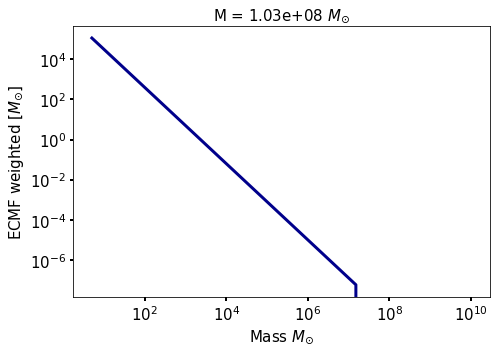

In [8]:
IGIMF.IMF_plot(M_ecl_v, ECMF_v, k_ecl, M_max, igimf.SFR * igimf.delta_t, r'ECMF weighted [$M_{\odot}$]')
Msun = r'$M_{\odot}$'
print(f"{igimf.delta_t = :.3e} yr")
print(f"{igimf.SFR = :.3e} Msun/yr")
print(f"{igimf.downsizing_time = :.3e} Gyr")
print(f"Iterations needed: {int(np.ceil(igimf.downsizing_time*1e9/igimf.delta_t))}")
print(f"{Mtot=:.3e}")
print(f"{M_igal=:.3e}")
print(f"The relative error is {(np.abs(integr.simpson(ECMF_weighted_v, x=M_ecl_v) - Mtot)/Mtot):.3e}")
print(f"The relative error is {np.divide(np.abs(integr.quad(igimf.weighted_func, M_ecl_v[0], M_ecl_v[-1], args=(ECMF_func,))[0] - Mtot),Mtot):.3e}")

In [9]:
print(f"{igimf.alpha_1 = }")
print(f"{igimf.alpha_2 = }")
Mecl = 1e3
alpha_3 = igimf.alpha_3_func(Mecl)
print(f"{alpha_3 = :.4f}")
k_star, m_max = igimf.normalization(igimf.initial_mass_function, Mecl, igimf.m_star_min, igimf.m_star_max, alpha_3)
print(f"{k_star = } and {m_max=} for {Mecl=}")

igimf.alpha_1 = 1.0354
igimf.alpha_2 = 2.0354
alpha_3 = 2.3000


/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF.py:92: RuntimeWarning: divide by zero encountered in reciprocal
  k = lambda x: np.reciprocal(integr.quad(IMF, x, upper_lim, args=(args),


k_star = 258.2137448137202 and m_max=48.02662198984469 for Mecl=1000.0


In [10]:
IMF_func = lambda m: k_star * igimf.initial_mass_function(m, m_max=m_max, alpha_3=alpha_3)
IMF_weighted_v = np.array([igimf.weighted_func(m, IMF_func) for m in m_v])
IMF_v = np.array([IMF_func(m) for m in m_v])

'The relative error is 1.309e-08'

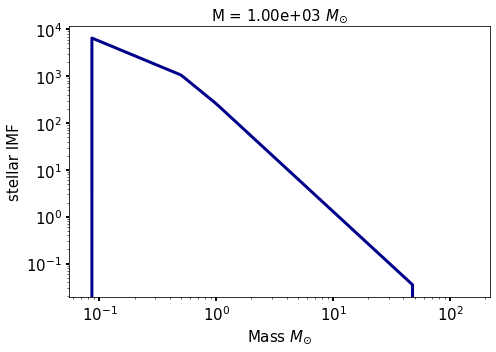

In [11]:
IGIMF.IMF_plot(m_v, IMF_v, k_star, m_max, Mecl, 'stellar IMF')
f"The relative error is {(np.divide(np.abs(integr.quad(igimf.weighted_func, m_v[0], m_v[-1], args=(IMF_func,))[0] - Mecl),Mecl)):.3e}"

In [12]:
IMF_norm = [igimf.normalization(igimf.initial_mass_function, M, igimf.m_star_min, igimf.m_star_max, alpha_3) for M in M_ecl_v]

/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF.py:92: RuntimeWarning: divide by zero encountered in reciprocal
  k = lambda x: np.reciprocal(integr.quad(IMF, x, upper_lim, args=(args),
